In [1]:
import torch
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
%matplotlib inline

import models
from tacotron2.text import text_to_sequence

In [2]:
taco_path = '/workspace/output/checkpoint_Tacotron2_210'
wg_path = '/workspace/output/pretrained/JoC_WaveGlow_FP32_PyT_20190306'

In [3]:
taco_checkpoint = torch.load(taco_path, map_location='cpu')
wg_checkpoint = torch.load(wg_path, map_location='cpu')

In [4]:
t2 = models.get_model('Tacotron2', taco_checkpoint['config'], to_cuda=True)
wg = models.get_model('WaveGlow', wg_checkpoint['config'], to_cuda=True)

In [5]:
for model, checkpoint in [(t2, taco_checkpoint), (wg, wg_checkpoint)]:
    new_state_dict = {}
    for key, value in checkpoint['state_dict'].items():
        new_key = key.replace('module.', '')
        new_state_dict[new_key] = value

    model.load_state_dict(new_state_dict)

In [6]:
t2.eval()
wg.eval()
print('Done')

Done


In [7]:

# text1 = "bom bom"
# text2 = "kit kat"

# bombom = [39, 52, 50, 11, 39, 52, 50]
# kitkat = [48, 46, 57, 11, 48, 38, 57]

In [113]:
text = "how are you? dataroot university"

In [114]:
inputs = np.array(text_to_sequence(text, ['english_cleaners']))[None, :]
print(inputs)
inputs = torch.from_numpy(inputs).to(device='cuda', dtype=torch.int64)
#inputs = torch.from_numpy(np.array([bombom, kitkat], dtype=np.int64)).to(device='cuda', dtype=torch.int64)

#input_lengths = torch.IntTensor([inputs.size(1), inputs.size(1)]).cuda().long()
input_lengths = torch.IntTensor([inputs.size(1)]).cuda().long()
speaker_id = torch.IntTensor([1]).cuda().long()

[[45 52 60 11 38 55 42 11 62 52 58 10 11 41 38 57 38 55 52 52 57 11 58 51
  46 59 42 55 56 46 57 62]]


In [115]:
# print(inputs.shape)
# print(speaker_id.shape)

In [116]:
embedded_speaker = t2.speakers_embedding(speaker_id)

In [117]:
embedded_speaker

tensor([[-1.9912e-01, -5.9939e-03,  1.4563e-03,  2.6623e-02, -6.5471e-02,
         -2.3702e-01, -8.2962e-02,  8.9209e-02,  2.0343e-02,  4.4080e-02,
          1.8311e-02, -1.6566e-01,  2.0897e-01, -4.6540e-03, -1.1316e-01,
          2.5468e-01, -2.2024e-01,  5.0163e-03, -1.7846e-02, -1.6528e-01,
          5.1203e-03, -1.8849e-01, -1.3190e-02,  9.1610e-02, -2.5157e-01,
          1.5202e-01,  3.1972e-01,  4.7328e-01,  8.6393e-02, -5.6835e-02,
         -2.0593e-02, -6.4241e-02, -4.6661e-02,  5.5877e-02, -6.0415e-02,
         -2.8076e-01,  2.1235e-01,  2.2805e-02,  6.9124e-02,  1.0890e-01,
         -1.7434e-02, -3.2559e-03, -7.6912e-03, -1.0559e-01,  5.2832e-02,
         -2.2959e-02, -8.8330e-02,  5.1279e-04, -1.1475e-01,  2.0638e-01,
          1.2719e-01,  1.8997e-01,  1.3135e-02,  8.3265e-03, -2.3654e-01,
         -1.3163e-01, -2.4707e-01,  1.7762e-02,  8.3829e-02, -4.0165e-02,
         -1.2941e-02, -1.1923e-03, -6.0242e-02, -2.2348e-01, -1.7087e-02,
          3.4482e-03, -7.5301e-02, -4.

In [118]:
# embedded_speaker

In [119]:
input_lengths

tensor([32], device='cuda:0')

In [120]:
# embedded_speaker

In [121]:
# with torch.no_grad():
#     speaker_id = speaker_id.unsqueeze(1)
#     print(speaker_id)
#     embedded_speaker = t2.speakers_embedding(speaker_id)
#     embedded_speaker = embedded_speaker.repeat(1, input_lengths, 1)
#     print(embedded_speaker.shape)
#     embedded_inputs = t2.symbols_embedding(inputs).transpose(1, 2)
#     torch.save(embedded_inputs, 'kitkat_se.pt')
#     encoder_outputs = t2.encoder(embedded_inputs, input_lengths)
#     torch.save(encoder_outputs, 'kitkat_eo.pt')
#     merged_outputs = torch.cat([encoder_outputs, embedded_speaker], -1)
#     print(merged_outputs.shape)
    
    
#     mel_outputs, gate_outputs, alignments = t2.decoder.infer(
#             merged_outputs)
#     print(mel_outputs.shape)

In [122]:
# embedded_inputs[1]

In [123]:
# bombom_emb = torch.load('bombom_se.pt')
# bombom_eo  = torch.load('bombom_eo.pt')
# kitkat_emb = torch.load('kitkat_se.pt')
# kitkat_eo  = torch.load('kitkat_eo.pt')

In [124]:
# kitkat_eo

In [125]:
# encoder_outputs[0]

In [126]:
with torch.no_grad():
    print(speaker_id)
    _, mel, _, _ = t2.infer(inputs, speaker_id)
    print(mel.shape)
    audio = wg.infer(mel)

tensor([1], device='cuda:0')
torch.Size([1, 80, 448])


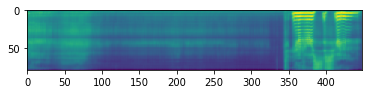

In [127]:
plt.imshow(mel.squeeze(0).detach().cpu().numpy())

In [128]:
audio_numpy = audio[0].data.cpu().numpy()
rate = 22050

In [129]:
Audio(audio_numpy, rate=rate)

## Mels from disk

In [185]:
import torch

In [186]:
mels = torch.load('file.pt')

In [187]:
mels.shape

torch.Size([2, 80, 747])

In [193]:
mel = mels[1].unsqueeze(0)[:, :, :450]

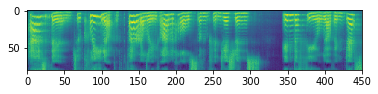

In [194]:
plt.imshow(mel.squeeze(0).detach().cpu().numpy())

In [195]:
with torch.no_grad():
    audio = wg.infer(mel)

In [196]:
audio_numpy = audio[0].data.cpu().numpy()
rate = 22050

In [197]:
Audio(audio_numpy, rate=rate)

In [ ]:
import torch
waveglow = torch.hub.load('nvidia/DeepLearningExamples:torchhub', 'nvidia_waveglow')

In [ ]:
import numpy as np
from scipy.io.wavfile import write

In [ ]:
waveglow = waveglow.remove_weightnorm(waveglow)
waveglow = waveglow.to('cuda')
waveglow.eval()

In [ ]:
tacotron2 = torch.hub.load('nvidia/DeepLearningExamples:torchhub', 'nvidia_tacotron2')
tacotron2 = tacotron2.to('cuda')
tacotron2.eval()

In [ ]:
text = "There is also this workaround in case you want to change the size without using the figure environment."

In [ ]:
sequence = np.array(tacotron2.text_to_sequence(text, ['english_cleaners']))[None, :]
sequence = torch.from_numpy(sequence).to(device='cuda', dtype=torch.int64)
input_lengths = torch.IntTensor([sequence.size(1)]).cuda().long()

In [ ]:
with torch.no_grad():
    inputs = tacotron2.parse_input(sequence)
    print(inputs.shape)
    embedded_inputs = tacotron2.embedding(inputs).transpose(1, 2)
    print(embedded_inputs.shape)
    encoder_outputs = tacotron2.encoder.inference(embedded_inputs)
    print(encoder_outputs.shape)
    mel_outputs, gate_outputs, alignments = tacotron2.decoder.inference(
            encoder_outputs)
    print(mel_outputs.shape)

In [ ]:
a,b,c,d = tacotron2.infer(sequence)

In [ ]:
b

In [ ]:

# run the models
with torch.no_grad():
    _, mel, _, _ = tacotron2.infer(sequence)
    audio = waveglow.infer(mel)
audio_numpy = audio[0].data.cpu().numpy()
rate = 22050

In [ ]:
from IPython.display import Audio
Audio(audio_numpy, rate=rate)

In [ ]:
mel.shape

In [ ]:
# Bom bom
# [[39 52 50 11 39 52 50]]
# kit kat
# [[48 46 57 11 48 38 57]]

